# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

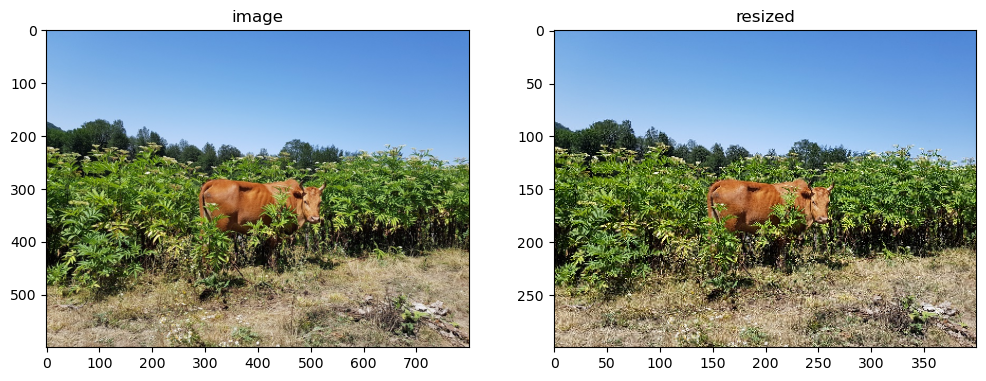

In [3]:
image = cv2.imread('images/input.jpg')

# Store height and width of the image
height, width = image.shape[:2]

#       | Sx 0 0 |
#  T  = | 0 Sy 0 |

# T is our translation matrix
T = np.float32([[0.5, 0, 0], [0, 0.5,0]])

# We use warpAffine to transform the image using the matrix, T
img_resized = cv2.warpAffine(image, T, (width//2, height//2))


plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(122);plt.imshow(img_resized[...,::-1]);plt.title("resized");

In [8]:
rotation_amount_degree = 10
#  convert rotation amount to radian
theta = rotation_amount_degree * np.pi / 180.0

image = cv2.imread('images/input.jpg')
height, width, _ = image.shape
T1 = np.float32([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) #Rotate
T2 = np.float32([[0.5, 0], [0, 0.5]]) #Scale
T = np.matmul(T1,T2) 
final_T = np.ones((2,3))*50 #Rotate + Scale
final_T[:,:-1] = T
print(final_T)

[[ 0.49240386 -0.08682409 50.        ]
 [ 0.08682409  0.49240386 50.        ]]


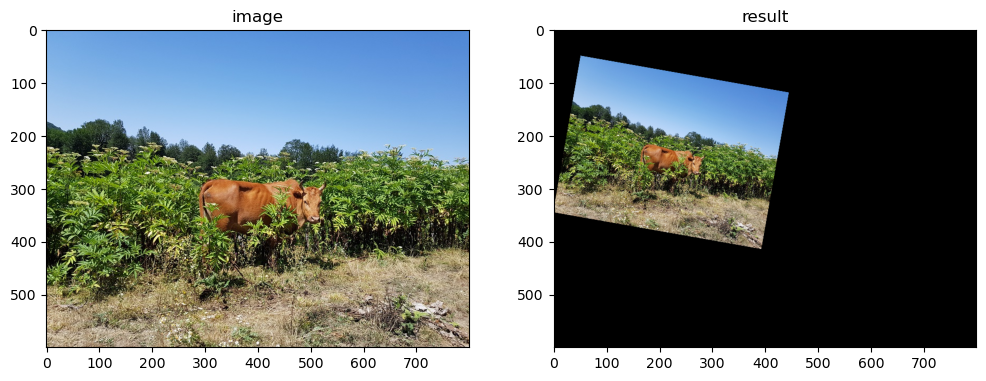

In [5]:
result = cv2.warpAffine(image, final_T, (width, height))

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("result");

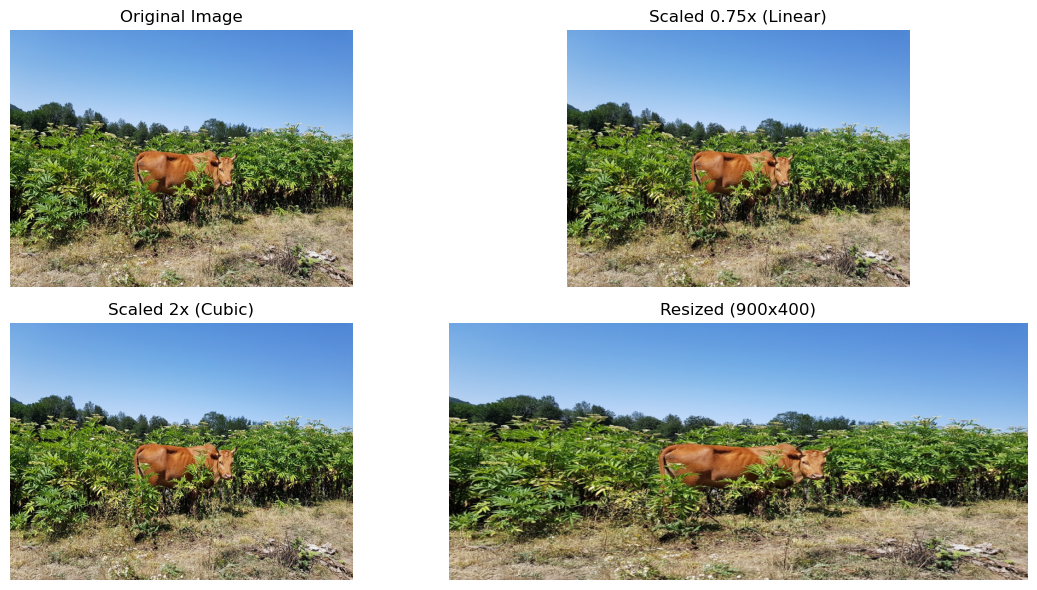

In [9]:
# load our input image
image = cv2.imread('images/input.jpg')
cv2.imshow('Original Image', image) 
cv2.waitKey()

# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
cv2.imshow('Scaling - Linear Interpolation', image_scaled) 
cv2.waitKey()

# Let's double the size of our image
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
cv2.waitKey()

# Let's skew the re-sizing by setting exact dimensions
img_scaled2 = cv2.resize(image, (900, 400), interpolation=cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled2) 
cv2.waitKey()

cv2.destroyAllWindows()

# ---------- نمایش با matplotlib ----------
titles = ['Original Image', 'Scaled 0.75x (Linear)', 'Scaled 2x (Cubic)', 'Resized (900x400)']
images = [image, image_scaled, img_scaled, img_scaled2]

plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i][..., ::-1])  # تبدیل BGR به RGB
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
